<div style="background-color:#f5f5f5; padding: 30px; border-radius: 15px; box-shadow: 2px 2px 10px #ccc;">

<h1 style="text-align:center; font-size: 36px; color: #154360; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-weight: bold;">
  📊 Text Mining Project 2025 – Development Notebook
</h1>

<hr style="border: none; height: 2px; background-color: #ccc; ">

In [1]:
import sys
sys.path.append('../src')

from utils import data_loader
from utils.visualization import *
import pandas as pd
from preprocessing.text_processor import TextPreprocessor
from features.feature_extraction import create_feature_extractor, CombinedFeatureExtractor
from sklearn.neighbors import KNeighborsClassifier
from models.classifiers import LSTMClassifier, TransformerClassifier, TorchClassifierWrapper

import nltk


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to C:\Users\Tiago
[nltk_data]     Pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Tiago
[nltk_data]     Pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Tiago
[nltk_data]     Pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Tiago
[nltk_data]     Pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Tiago
[nltk_data]     Pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Tiago
[nltk_data]     Pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading pack

True

<div style="background-color:#f5f5f5; padding: 30px; border-radius: 15px; box-shadow: 2px 2px 10px #ccc;">

<h2 style="color: #1A5276; font-size: 28px; font-weight: bold;">1. 📁 Data Exploration</h2>

<div style="background-color:#f5f5f5; padding: 30px; border-radius: 15px; box-shadow: 2px 2px 10px #ccc;">

<h3 style="color:#1A5276; font-weight: bold;">1.1 Dataset Overview</h3>
<p style="font-size: 15px; color:rgb(105, 105, 107); font-weight: bold; ">Overview of training and testing data, structure, and basic statistics.</p>


In [2]:
try:
    train_df, test_df = data_loader.load_datasets()
    print("\nDataset Statistics:")
    print(f"Training samples: {len(train_df)}")
    print(f"Test samples: {len(test_df)}")
except Exception as e:
    print(f"Error loading datasets: {str(e)}")


Dataset Statistics:
Training samples: 9543
Test samples: 2388


<div style="background-color:#f5f5f5; padding: 30px; border-radius: 15px; box-shadow: 2px 2px 10px #ccc;">

<h3 style="color:#1A5276; font-weight: bold;">1.2 Class Distribution</h3>
<p style="font-size: 15px; color:rgb(105, 105, 107); font-weight: bold; ">Visual representation (bar chart or pie chart) of class frequencies: Bearish, Bullish, Neutral.</p>

In [3]:
fig = plot_class_distribution(train_df, label_col='label')

fig.show()

save_plot(fig, filename='class_distribution')
print("Gráfico salvo em results/class_distribution.html")

Gráfico salvo em results/class_distribution.html


<div style="background-color:#f5f5f5; padding: 30px; border-radius: 15px; box-shadow: 2px 2px 10px #ccc;">

<h3 style="color:#1A5276; font-weight: bold;">1.3 Most Frequent Words</h3>
<p style="font-size: 15px;  color:rgb(105, 105, 107); font-weight: bold; ">Top n-grams or tokens per class, shown using bar charts or tables.</p>

In [4]:
label_map = {0: "Bearish", 1: "Bullish", 2: "Neutral"}

for label, label_name in label_map.items():
    texts = train_df[train_df['label'] == label]['text']
    fig = plot_word_frequencies(texts, top_n=20)
    fig.show()
    save_plot(fig, filename=f'word_frequencies_{label_name.lower()}')
    print(f"Gráfico salvo em results/word_frequencies_{label_name.lower()}.html")

fig_all = plot_word_frequencies(train_df['text'], top_n=20)
fig_all.show()
save_plot(fig_all, filename='word_frequencies_all')
print("Gráfico geral salvo em results/word_frequencies_all.html")

Gráfico salvo em results/word_frequencies_bearish.html


Gráfico salvo em results/word_frequencies_bullish.html


Gráfico salvo em results/word_frequencies_neutral.html


Gráfico geral salvo em results/word_frequencies_all.html


<div style="background-color:#f5f5f5; padding: 30px; border-radius: 15px; box-shadow: 2px 2px 10px #ccc;">

<h3 style="color:#1A5276; font-weight: bold;">1.4 Word Clouds</h3>
<p style="font-size: 15px;  color:rgb(105, 105, 107); font-weight: bold; ">Generate and interpret word clouds for each sentiment category.</p>

C:\Users\Tiago Pedro\AppData\Local\Temp\ipykernel_21956\912002117.py:8: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



Word cloud salva em results/wordcloud_bearish.png
Word cloud salva em results/wordcloud_bullish.png
Word cloud salva em results/wordcloud_neutral.png
Word cloud geral salva em results/wordcloud_all.png


C:\Users\Tiago Pedro\AppData\Local\Temp\ipykernel_21956\912002117.py:13: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



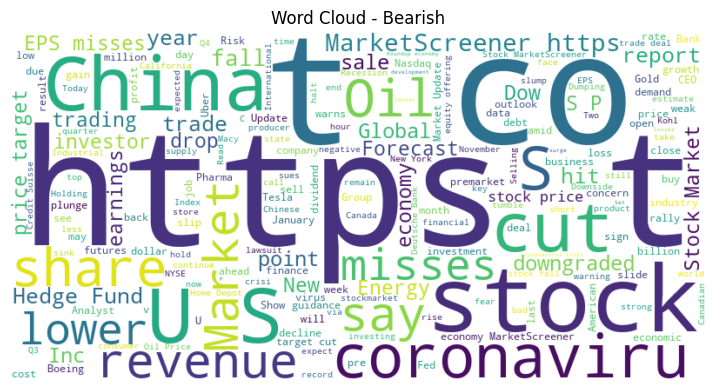

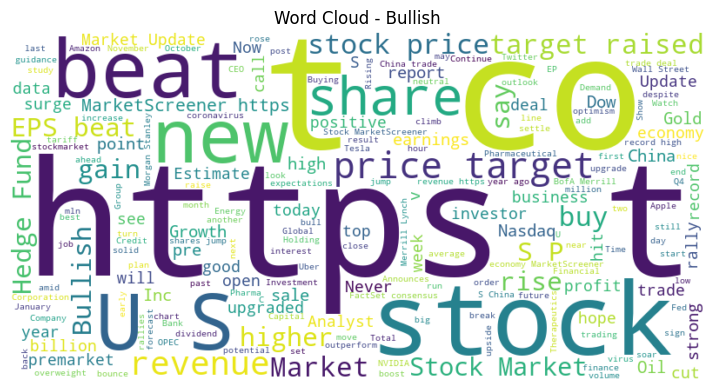

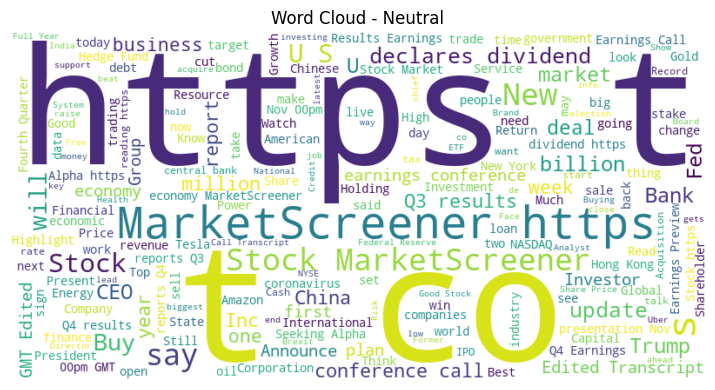

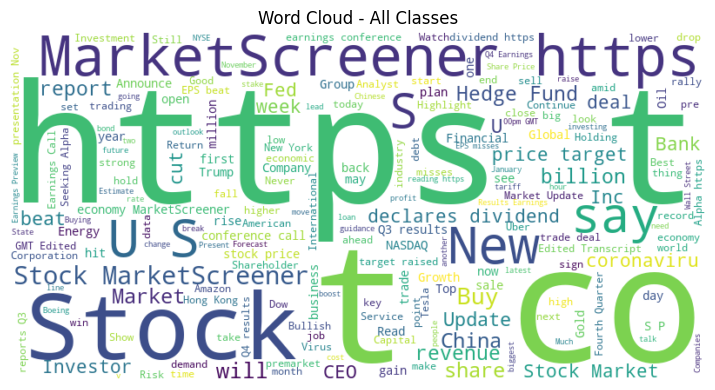

In [5]:
label_map = {0: "Bearish", 1: "Bullish", 2: "Neutral"}

for label, label_name in label_map.items():
    fig = plot_wordcloud(
        train_df[train_df['label'] == label]['text'],
        title=f"Word Cloud - {label_name}"
    )
    fig.show()
    save_fig(fig, filename=f'wordcloud_{label_name.lower()}')
    print(f"Word cloud salva em results/wordcloud_{label_name.lower()}.png")

fig_all = plot_wordcloud(train_df['text'], title="Word Cloud - All Classes")
fig_all.show()
save_fig(fig_all, filename='wordcloud_all')
print("Word cloud geral salva em results/wordcloud_all.png")

<hr style="border: none; height: 1px; background-color: #ccc;">

<div style="background-color:#f5f5f5; padding: 30px; border-radius: 15px; box-shadow: 2px 2px 10px #ccc;">

<h2 style="color: #1A5276; font-size: 28px; font-weight: bold;">2. 🧹 Data Preprocessing</h2>

<p style="font-size: 16px; color: #333;">
Text preprocessing is a crucial step to ensure the quality and consistency of the data used for analysis and machine learning models. In this project, we implemented a custom <b>TextPreprocessor</b> class that systematically applies the following steps:
</p>

<ul style="font-size: 15px; color: #333; margin-left: 20px;">
  <li><b>Punctuation removal:</b> Eliminates unnecessary punctuation marks, optionally preserving hyphens.</li>
  <li><b>Whitespace normalization:</b> Ensures there are no extra spaces between words.</li>
  <li><b>Emoji removal:</b> Removes emoji characters to reduce textual noise.</li>
  <li><b>Contraction expansion:</b> Expands contractions (e.g., "don't" → "do not") for vocabulary consistency.</li>
  <li><b>Unicode normalization:</b> Converts special characters to ASCII format.</li>
  <li><b>Stopword removal:</b> Removes common words that do not add significant meaning (e.g., "the", "and", "of").</li>
  <li><b>Lemmatization:</b> Reduces words to their base form (e.g., "running" → "run").</li>
  <li><b>Stemming:</b> Optionally, applies stemming to reduce words to their root form.</li>
</ul>

<p style="font-size: 16px; color: #333;">
All these steps were systematically applied to the entire dataset, resulting in a new <b>text_clean</b> column with preprocessed texts ready for exploratory analysis, word cloud generation, and model training.
</p>

</div>

In [6]:
preprocessor = TextPreprocessor()
print("Applying preprocessing to training set...")
train_df['text_clean'] = train_df['text'].apply(preprocessor.preprocess)
print("Done! Example (train):")
display(
    train_df[['text', 'text_clean']].head().style
        .set_properties(**{'background-color': '#f9f9f9', 'color': '#154360', 'font-size': '14px'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#D6EAF8'), ('color', '#154360'), ('font-size', '15px')]}
        ])
        .set_caption("Sample of Preprocessed Training Data")
)

print("Applying preprocessing to test set...")
test_df['text_clean'] = test_df['text'].apply(preprocessor.preprocess)
print("Done! Example (test):")
display(
    test_df[['text', 'text_clean']].head().style
        .set_properties(**{'background-color': '#f9f9f9', 'color': '#154360', 'font-size': '14px'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#D6EAF8'), ('color', '#154360'), ('font-size', '15px')]}
        ])
        .set_caption("Sample of Preprocessed Test Data")
)

Applying preprocessing to training set...
Done! Example (train):


,text,text_clean
0,$BYND - JPMorgan reels in expectations on Beyond Meat https://t.co/bd0xbFGjkT,bynd jpmorgan reel expectation beyond meat
1,$CCL $RCL - Nomura points to bookings weakness at Carnival and Royal Caribbean https://t.co/yGjpT2ReD3,ccl rcl nomura point booking weakness carnival royal caribbean
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan on weak building outlook https://t.co/KN1g4AWFIb",cx cemex cut credit suisse j.p. morgan weak building outlook
3,$ESS: BTIG Research cuts to Neutral https://t.co/MCyfTsXc2N,es btig research cut neutral
4,$FNKO - Funko slides after Piper Jaffray PT cut https://t.co/z37IJmCQzB,fnko funko slide piper jaffray pt cut


Applying preprocessing to test set...
Done! Example (test):


,text,text_clean
0,"ETF assets to surge tenfold in 10 years to $50 trillion, Bank of America predicts",etf asset surge tenfold year price trillion bank america predicts
1,Here’s What Hedge Funds Think Evolution Petroleum Corporation (EPM),hedge fund think evolution petroleum corporation epm
2,$PVH - Phillips-Van Heusen Q3 2020 Earnings Preview https://t.co/kNhCYwVnBX,pvh phillips-van heusen q earnings preview
3,"China is in the process of waiving retaliatory tariffs on imports of U.S. pork and soy by domestic companies, a pro… https://t.co/08mZU9TrBX",china process waiving retaliatory tariff import you.s pork soy domestic company a pro
4,"Highlight: “When growth is scarce, investors seem very willing to pay up for growth stock"" @PNCBank's… https://t.co/rO4fBOkBG9",highlight growth scarce investor seem willing pay up growth stock


<hr style="border: none; height: 1px; background-color: #ccc;">

<div style="background-color:#f5f5f5; padding: 30px; border-radius: 15px; box-shadow: 2px 2px 10px #ccc;">

<h2 style="color: #1A5276; font-size: 28px; font-weight: bold;">4. ⚙️ Feature Engineering</h2>

<div style="background-color:#f5f5f5; padding: 30px; border-radius: 15px; box-shadow: 2px 2px 10px #ccc;">

<h3 style="color:#1A5276; font-weight: bold;">4.1 Bag-of-Words (BoW/TF-IDF)</h3>

In [7]:
bow_extractor = create_feature_extractor('bow', max_features=1000)

X_train_bow = bow_extractor.fit_transform(train_df['text_clean'])
X_test_bow = bow_extractor.transform(test_df['text_clean'])

print("Bag-of-Words feature matrix (train) shape:", X_train_bow.shape)
print("Bag-of-Words feature matrix (test) shape:", X_test_bow.shape)

Bag-of-Words feature matrix (train) shape: (9543, 1000)
Bag-of-Words feature matrix (test) shape: (2388, 1000)


In [8]:
feature_names = bow_extractor.vectorizer.get_feature_names_out()
import numpy as np
top_indices = np.asarray(X_train_bow.sum(axis=0)).ravel().argsort()[::-1][:10]
print("Top 10 words:", feature_names[top_indices])

Top 10 words: ['stock' 'price' 'market' 'report' 'marketscreener' 'result' 'say' 'share'
 'stock marketscreener' 'earnings']


<div style="background-color:#f5f5f5; padding: 30px; border-radius: 15px; box-shadow: 2px 2px 10px #ccc;">

<h3 style="color:#1A5276; font-weight: bold;">4.2 Word2Vec (FastText)</h3>

In [9]:
w2v_extractor = create_feature_extractor('word2vec', vector_size=100, window=5, min_count=2, use_fasttext=False)

X_train_w2v = w2v_extractor.fit_transform(train_df['text_clean'])
X_test_w2v = w2v_extractor.transform(test_df['text_clean'])

print("Word2Vec feature matrix (train) shape:", X_train_w2v.shape)
print("Word2Vec feature matrix (test) shape:", X_test_w2v.shape)

Word2Vec feature matrix (train) shape: (9543, 100)
Word2Vec feature matrix (test) shape: (2388, 100)


<div style="background-color:#f5f5f5; padding: 30px; border-radius: 15px; box-shadow: 2px 2px 10px #ccc;">

<h3 style="color:#1A5276; font-weight: bold;">4.3 Transformer (ex: BERT/FinBERT)</h3>

In [11]:
transformer_extractor = create_feature_extractor(
    method='transformer',
    model_name='bert-base-uncased',
    max_length=128,
    batch_size=16,
    pooling_strategy='mean_pooling'
)

train_texts = train_df['text_clean'].fillna("").astype(str).tolist()
test_texts = test_df['text_clean'].fillna("").astype(str).tolist()

X_train_transformer = transformer_extractor.fit_transform(train_texts)
X_test_transformer = transformer_extractor.transform(test_texts)

print("Transformer feature matrix (train) shape:", X_train_transformer.shape)
print("Transformer feature matrix (test) shape:", X_test_transformer.shape)

Transformer feature matrix (train) shape: (9543, 768)
Transformer feature matrix (test) shape: (2388, 768)


<div style="background-color:#f5f5f5; padding: 30px; border-radius: 15px; box-shadow: 2px 2px 10px #ccc;">

<h3 style="color:#1A5276; font-weight: bold;">4.4 Combined Feature Extractor</h3>
<p style="font-size: 15px;  color:rgb(105, 105, 107); font-weight: bold;">Compare and document the various representations used to transform text into numerical format.</p>

<div style="background-color:#f5f5f5; padding: 30px; border-radius: 15px; box-shadow: 2px 2px 10px #ccc;">

<h2 style="color: #1A5276; font-size: 28px; font-weight: bold;">5. 🤖 Classification Models</h2>


<div style="background-color:#f5f5f5; padding: 30px; border-radius: 15px; box-shadow: 2px 2px 10px #ccc;">

<h3 style="color:#1A5276; font-weight: bold;">5.1 K-Nearest Neighbors (KNN)</h3>

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_bow, train_df['label'])
y_pred_knn = knn.predict(X_test_bow)
print("KNN predictions:", y_pred_knn[:5])

KNN predictions: [0 2 2 0 0]


c:\Users\Tiago Pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não conseguiu localizar o ficheiro especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "c:\Users\Tiago Pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Tiago Pedro\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 546, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Tiago Pedro\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1022, in __init__
    self._execute_child(args, executable, 

<div style="background-color:#f5f5f5; padding: 30px; border-radius: 15px; box-shadow: 2px 2px 10px #ccc;">

<h3 style="color:#1A5276; font-weight: bold;">5.2 LSTM</h3>

In [ ]:
input_size = X_train_w2v.shape[1]
lstm_model = LSTMClassifier(input_size=input_size, num_classes=3)
lstm_wrapper = TorchClassifierWrapper(lstm_model, batch_size=32)
lstm_wrapper.fit(X_train_w2v, train_df['label'].values)
y_pred_lstm = lstm_wrapper.predict(X_test_w2v)
print("LSTM predictions:", y_pred_lstm[:5])

LSTM predictions: [0 1 2 0 1]


<div style="background-color:#f5f5f5; padding: 30px; border-radius: 15px; box-shadow: 2px 2px 10px #ccc;">

<h3 style="color:#1A5276; font-weight: bold;">5.3 Transformers</h3>

In [ ]:
from models.classifiers import TransformerClassifier, TorchClassifierWrapper

input_size = X_train_transformer.shape[1]
transformer_model = TransformerClassifier(input_size=input_size, num_classes=3)
transformer_wrapper = TorchClassifierWrapper(transformer_model)

transformer_wrapper.fit(X_train_transformer, train_df['label'].values)
y_pred_transformer = transformer_wrapper.predict(X_test_transformer)
print("Transformer predictions:", y_pred_transformer[:5])

Transformer predictions: [0 2 2 0 1]


<div style="background-color:#f5f5f5; padding: 30px; border-radius: 15px; box-shadow: 2px 2px 10px #ccc;">

<h3 style="color:#1A5276; font-weight: bold;">5.4 Torch</h3>

In [ ]:
input_size = X_train_transformer.shape[1]
transformer_model = TransformerClassifier(input_size=input_size, num_classes=3)
transformer_wrapper = TorchClassifierWrapper(transformer_model)
transformer_wrapper.fit(X_train_transformer, train_df['label'].values)
y_pred_transformer = transformer_wrapper.predict(X_test_transformer)
print("Transformer predictions:", y_pred_transformer[:5])

Transformer predictions: [0 2 2 1 1]


<hr style="border: none; height: 1px; background-color: #ccc;">

<div style="background-color:#f5f5f5; padding: 30px; border-radius: 15px; box-shadow: 2px 2px 10px #ccc;">

<h2 style="color: #1A5276; font-size: 28px; font-weight: bold;">6. 📈 Models & Ensemble Training</h2>

In [ ]:
%run ../src/train_models.py

In [ ]:
%run ../src/train_models.py

<div style="background-color:#f5f5f5; padding: 30px; border-radius: 15px; box-shadow: 2px 2px 10px #ccc;">

<h2 style="color: #1A5276; font-size: 28px; font-weight: bold;">7. 📈 Final Evaluation</h2>

<div style="background-color:#f5f5f5; padding: 30px; border-radius: 15px; box-shadow: 2px 2px 10px #ccc;">

<h3 style="color:#1A5276; font-weight: bold;">7.1 Data Exploration</h3>

In [ ]:
%run ../src/analysis/data_exploration.py

<div style="background-color:#f5f5f5; padding: 30px; border-radius: 15px; box-shadow: 2px 2px 10px #ccc;">

<h3 style="color:#1A5276; font-weight: bold;">7.2 Preprocessing Analysis</h3>

In [ ]:
%run ../src/analysis/preprocessing_analysis.py

<div style="background-color:#f5f5f5; padding: 30px; border-radius: 15px; box-shadow: 2px 2px 10px #ccc;">

<h3 style="color:#1A5276; font-weight: bold;">7.3 Feature Analysis </h3>

In [ ]:
%run ../src/analysis/feature_analysis.py

<div style="background-color:#f5f5f5; padding: 30px; border-radius: 15px; box-shadow: 2px 2px 10px #ccc;">

<h3 style="color:#1A5276; font-weight: bold;">7.4 Visualizations </h3>

In [17]:
%run ../src/visualization/feature_comparison_viz.py

%run ../src/visualization/plot_confusion_matrix.py

<div style="background-color:#f5f5f5; padding: 30px; border-radius: 15px; box-shadow: 2px 2px 10px #ccc;">

<h3 style="color:#1A5276; font-weight: bold;">7.5 Comparisons </h3>

In [ ]:
%run ../src/scripts/compare_features.py

%run ../src/scripts/visualize_comparison.py